<a href="https://colab.research.google.com/github/hopesofbuzzy/URFU_adii/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B8/1-2/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BF%D0%B0%D1%82%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика № 1.

**Цель**. Познакомимся с маленьким фрагментном реального файла, содержащего данные для анализа. В этом фрагменте собраны некоторые характерные проблемы тех таблиц, которые дают заказчики для проведения анализа.


Познакомиться с некоторыми методам оценки оценки взаимосвязи бинарных факторов: расчет доверительных интервалов для относительного риска и точным тестом Фишера.

Обезличенные данные по детям с диагнозом "Острый лимфобластный лейкоз" (ОЛЛ).

https://docs.google.com/spreadsheets/d/1LuX3Ks3cFCWtbuPIYS37VPbro6gOb3H9/edit?usp=sharing&ouid=114299830697284631791&rtpof=true&sd=true


In [ ]:
from google.colab import files #to upload files Для загрузки файлов, не менять
import numpy as np
import pandas as pd
from scipy import stats


files.upload()
df = pd.read_excel('clinic.xlsx', index_col=0)

pd.set_option('display.max_rows', None)
df.shape

Saving clinic.xlsx to clinic.xlsx


(200, 63)

Выведем первые пять строк

$m \pm \sigma,$ где $m$ - среднее, а $\sigma$ - стандартное отклонение.

стандартное отклонение - это не дисперсия, и это не стандартная ошибка средней.

In [ ]:
features = ['Срок гестации' , 'Масса гр', 'Длина см', 'Возраст']

In [ ]:
df[features].describe()

,Срок гестации,Масса гр,Длина см,Возраст
count,162.000000,197.000000,195.000000,200.000000
mean,38.364198,3392.685279,51.774359,6.550000
std,3.854104,529.652960,3.242813,3.980796
min,0.000000,980.000000,33.000000,3.000000
25%,38.000000,3120.000000,50.500000,3.000000
50%,39.000000,3450.000000,52.000000,5.000000
75%,40.000000,3700.000000,54.000000,9.000000
max,42.000000,4600.000000,60.000000,17.000000


In [ ]:
genders = df['Пол'].value_counts()
display(genders)

,count
Пол,
М,105
Ж,95


In [ ]:
df[df['Пол'] == 'М'][features].describe()

,Срок гестации,Масса гр,Длина см,Возраст
count,82.000000,102.000000,101.000000,105.00000
mean,37.975610,3421.637255,52.029703,6.52381
std,4.766073,526.830835,3.144695,4.29914
min,0.000000,1370.000000,38.000000,3.00000
25%,38.000000,3120.000000,51.000000,3.00000
50%,39.000000,3445.000000,52.000000,5.00000
75%,40.000000,3700.000000,54.000000,9.00000
max,42.000000,4600.000000,60.000000,17.00000


In [ ]:
df[df['Пол'] == 'Ж'][features].describe()

,Срок гестации,Масса гр,Длина см,Возраст
count,80.00000,95.000000,94.000000,95.000000
mean,38.76250,3361.600000,51.500000,6.578947
std,2.58155,533.698484,3.340047,3.619036
min,26.00000,980.000000,33.000000,3.000000
25%,38.00000,3118.000000,50.250000,3.000000
50%,39.00000,3460.000000,52.000000,6.000000
75%,40.00000,3700.000000,53.000000,9.000000
max,42.00000,4400.000000,58.000000,17.000000


In [ ]:
df[df['Группа про/ретро'] == 1]['Недоношенный'].value_counts()

,count
Недоношенный,
0.0,110
1.0,20


In [ ]:
df[df['Группа про/ретро'] == 0]['Недоношенный'].value_counts()

,count
Недоношенный,
0.0,51
1.0,11


In [ ]:
df[['Группа про/ретро', 'Недоношенный']]

,Группа про/ретро,Недоношенный
ID,,
1,1,1.0
2,1,0.0
3,1,0.0
4,1,0.0
5,1,0.0
6,1,0.0
7,1,0.0
8,1,0.0
9,1,0.0


In [ ]:
pd.crosstab(df['Группа про/ретро'], df['Недоношенный'],
            margins=True, margins_name = 'Итого')

Недоношенный,0.0,1.0,Итого
Группа про/ретро,,,
0,51,11,62
1,110,20,130
Итого,161,31,192


In [ ]:
pd.crosstab(df['Недоношенный'], df['Факт первичного эпизода ПНП'],
            margins=True, margins_name = 'Итого')

Факт первичного эпизода ПНП,0,1,Итого
Недоношенный,,,
0.0,31,130,161
1.0,3,28,31
Итого,34,158,192


In [ ]:
expRiskOutcomeNo = 3
expRiskOutcomeYes = 28
controlOutcomeNo = 31
controlOutcomeYes = 130

In [ ]:
PNPexp = expRiskOutcomeYes / (expRiskOutcomeYes + expRiskOutcomeNo)
PNPcon = controlOutcomeYes / (controlOutcomeYes + controlOutcomeNo)

risks = [PNPexp, PNPcon]
risks

[0.9032258064516129, 0.8074534161490683]

<BarContainer object of 2 artists>

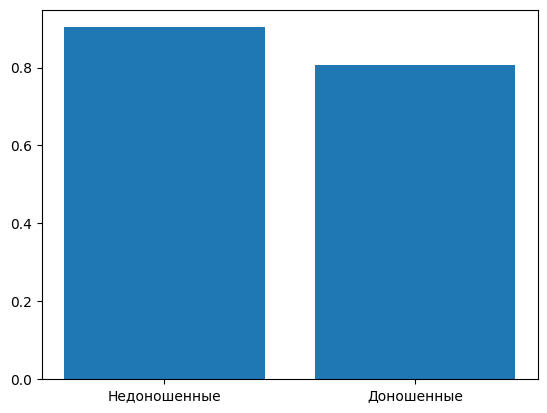

In [ ]:
from matplotlib import pyplot as plt

plt.bar(x = ['Недоношенные' , 'Доношенные'], height = risks)

Точный тест Фишера тестирует нулевую гипотезу, состоящую в том, что группа риска (недоношенные дети) и группа сравнения (доношенные дети) не отличаются по частоте возникновения ПНП.

p или полностью p-value = 0.3034 - это больше, чем уровень значимости ($\alpha =0.05$), следовательно нет оснований отвергнуть нулевую гипотезу. Считаем, что недоношенность не является фактором риска развития ПНП.

In [ ]:
from scipy.stats import fisher_exact

fisherTest = fisher_exact([ [expRiskOutcomeYes, expRiskOutcomeNo],
                            [controlOutcomeYes, controlOutcomeNo]])
print('Точный тест Фишера p-value = ', round(fisherTest[1], 4), '\n')

Точный тест Фишера p-value =  0.3034 



In [ ]:
pd.crosstab(df['Недоношенный'], df['Факт первичного эпизода ПНП'],
            normalize = 'index',
            margins=True, margins_name = 'Итого').mul(100).round(1)

Факт первичного эпизода ПНП,0,1
Недоношенный,,
0.0,19.3,80.7
1.0,9.7,90.3
Итого,17.7,82.3


In [ ]:
pd.crosstab(df['Недоношенный'], df['Факт первичного эпизода ПНП'],
            normalize = 'columns',
            margins=True, margins_name = 'Итого').mul(100).round(1)

Факт первичного эпизода ПНП,0,1,Итого
Недоношенный,,,
0.0,91.2,82.3,83.9
1.0,8.8,17.7,16.1


In [ ]:
pd.crosstab(df['ВН'], df['МН'])

МН,0,1
ВН,,
0,72,58
1,35,35


In [ ]:
pd.crosstab(df['ВН'], df['МН'], normalize = 'index').mul(100).round(1)

МН,0,1
ВН,,
0,55.4,44.6
1,50.0,50.0


**Задание 1**

Какие проблемы со столбцами

1. AG - AI (Курение мать, Курение отец, Курение оба)
2. BE, CF (Селезенка <4 см, Селезенка >4см)

Где еще аналогичная проблема?

В стоблцах AZ - BK перечислены сопуствующие болезни. Здесь 1 означает наличие болезни, 0 - отсутствие.

1. Какие проблемы со стоблцом AJ?
2. Какие проблемы со стоблцами AK - AN? Здесь СБ1 означает наличие ровно 1 сопуствующей болезни, СБ2 означает наличие ровно 2 сопуствующих болезней... Можно ли поставить вопрос, как наличие ровно 2 сопуствующих болезней связано с риском развития полинейропатии (Факт первичного эпизода ПНП), стоблец CE?

Как решить эти проблемы?


**Задание 2**

К какой шкале относится

1. пол, стоблец C,
2. генетика, стоблец Q,
3. возраст матери при беременности, стоблец R,
4. номер беременности, от которой родился этот ребенок, стоблец S.

**Задание 3**

Начнем с описательных статистик.

1. Сколько мальчиков и девочек? Сколько детей с ОЛЛ типа В и типа Т?

2. Каково распределение транслокаций от t 1;19 до t 12;21?

3. Сколько мальчиков и девочек в проспективной и ретроспективной группах? Сколько детей с ОЛЛ типа В и типа Т в проспективной и ретроспективной группах?

4. Сделаем двухфакторное разбиение на группы. Дать описательные статистики по возрасту в зависимости от группы (проспективной и ретроспективной), столбец B, и факта первичного эпизода ПНП (полинейропатии), столбец BI.
То же для "Срок гестации", "Масса гр", "Длина см".

5. Сколько детей имеют ВН, МН и СН (Моторная нейропатия, Сенсорная нейропатия, Вегетативная нейропатия) во всех их возможных комбинациях? Составить таблицу и образить это на диаграмме.



In [ ]:
print(df['Пол'].value_counts(normalize = True).mul(100))

Пол
М    52.5
Ж    47.5
Name: proportion, dtype: float64


In [ ]:
print(df['Пол'].value_counts())
print(df['Пол'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%')

Пол
М    105
Ж     95
Name: count, dtype: int64
Пол
М    52.5%
Ж    47.5%
Name: proportion, dtype: object


Колонок с транслокациями с десяток (а иной задаче может быть и более 100). Повторять вручную однообразные дейстивя для всех видов транслокаций - плохая идея. Это делает решение немасштабируемым и подверженным ошибкам (пропуск нужной колонки, дублирование результатов в отчете и т. д.)

Напишем функцию, которая позволить перебрать весь диапозон колонок от заданной fromColName до заданной toColName.

In [ ]:
factorList = []

def getColumnsNames(fromColName, toColName, columnsList):
  indexStart = df.columns.get_loc(fromColName)
  indexEnd = df.columns.get_loc(toColName)
  for i in range(indexStart, indexEnd + 1):
    columnsList.append(i)

In [ ]:
getColumnsNames('t 1;19', 't 12;21', factorList)

for factor in factorList:
  columnnName = df.columns[factor]
  print(df[columnnName].value_counts(), end='\n\n')

0    190
1     10
Name: t 1;19, dtype: int64

0    199
1      1
Name: t 7;9, dtype: int64

0    199
1      1
Name: t 1;3, dtype: int64

0    198
1      2
Name: t 4;11, dtype: int64

0    199
1      1
Name: t 2;14, dtype: int64

0    199
1      1
Name: t 12;19, dtype: int64

0    195
1      5
Name: t 9;22, dtype: int64

0    161
1     39
Name: t 12;21, dtype: int64



Выбрать детей из проспективной группы и провести частотный анализ по полу можно так:

In [ ]:
df[df['Группа про/ретро'] == 0]['Пол'].value_counts()

,count
Пол,
М,39
Ж,30


Можно использовать метод groupby

Чтобы не выполнять частотный анализ вручную для всех интересующих признаков, сделаем это в цикле:

In [ ]:
colNames = ['Пол', 'ОЛЛ']
colNames.append('Группа про/ретро')

dgr = df[colNames].groupby('Группа про/ретро')

for col in colNames:
  print(dgr[col].value_counts(normalize = True).mul(100).round(1), end='\n\n')

Группа про/ретро  Пол
0                 М      56.5
                  Ж      43.5
1                 М      50.4
                  Ж      49.6
Name: proportion, dtype: float64

Группа про/ретро  ОЛЛ
0                 В      88.4
                  Т      11.6
1                 В      93.9
                  Т       6.1
Name: proportion, dtype: float64

Группа про/ретро
0    100.0
1    100.0
Name: proportion, dtype: float64



In [ ]:
df[['Возраст', 'Масса гр', 'Длина см']].describe()

,Возраст,Масса гр,Длина см
count,200.000000,197.000000,195.000000
mean,6.550000,3392.685279,51.774359
std,3.980796,529.652960,3.242813
min,3.000000,980.000000,33.000000
25%,3.000000,3120.000000,50.500000
50%,5.000000,3450.000000,52.000000
75%,9.000000,3700.000000,54.000000
max,17.000000,4600.000000,60.000000


In [ ]:
colNames = ['Возраст', 'Срок гестации', 'Масса гр', 'Длина см',
            'Группа про/ретро', 'Факт первичного эпизода ПНП']


dgr = df[colNames].groupby(['Группа про/ретро', 'Факт первичного эпизода ПНП'])

for col in colNames[:-2]:
  print(col)
  display(dgr[col].describe().transpose())


Возраст


Группа про/ретро                     0                     1            
Факт первичного эпизода ПНП          0          1          0           1
count                        13.000000  56.000000  25.000000  106.000000
mean                          5.076923   7.089286   6.280000    6.509434
std                           3.426892   4.810129   3.835362    3.573035
min                           3.000000   3.000000   3.000000    3.000000
25%                           3.000000   3.000000   3.000000    3.000000
50%                           4.000000   4.000000   5.000000    6.000000
75%                           5.000000  10.500000   7.000000    8.000000
max                          13.000000  17.000000  17.000000   16.000000

Срок гестации


Группа про/ретро                     0                     1            
Факт первичного эпизода ПНП          0          1          0           1
count                         5.000000  29.000000  24.000000  104.000000
mean                         39.200000  36.931034  39.208333   38.528846
std                           2.167948   7.544776   1.503016    2.500317
min                          36.000000   0.000000  36.000000   26.000000
25%                          39.000000  37.000000  38.000000   38.000000
50%                          39.000000  39.000000  39.500000   39.000000
75%                          40.000000  40.000000  40.000000   40.000000
max                          42.000000  41.000000  42.000000   42.000000

Масса гр


Группа про/ретро                      0                         1             
Факт первичного эпизода ПНП           0            1            0            1
count                          12.00000    54.000000    25.000000   106.000000
mean                         3247.00000  3421.944444  3492.280000  3370.783019
std                           473.13154   565.863455   317.414361   556.635009
min                          2550.00000  1370.000000  2945.000000   980.000000
25%                          2895.00000  3127.500000  3346.000000  3120.000000
50%                          3275.00000  3490.000000  3420.000000  3455.000000
75%                          3617.50000  3722.500000  3735.000000  3700.000000
max                          4000.00000  4600.000000  4130.000000  4600.000000

Длина см


Группа про/ретро                     0                     1            
Факт первичного эпизода ПНП          0          1          0           1
count                        12.000000  52.000000  25.000000  106.000000
mean                         50.583333  51.923077  52.280000   51.716981
std                           2.712206   3.661384   1.620699    3.362977
min                          45.000000  38.000000  49.000000   33.000000
25%                          49.750000  50.000000  51.000000   51.000000
50%                          50.500000  52.000000  52.000000   52.000000
75%                          52.250000  54.000000  53.000000   54.000000
max                          54.000000  59.000000  56.000000   60.000000

In [ ]:
pd.crosstab(df['ВН'], df['МН'],
                      margins=True, margins_name='Итого')

МН,0,1,Итого
ВН,,,
0,72,58,130
1,35,35,70
Итого,107,93,200


In [ ]:
pd.crosstab(df['ВН'], df['МН'],
                      normalize = 'index', margins_name='Итого').mul(100).round(1)

МН,0,1
ВН,,
0,55.4,44.6
1,50.0,50.0


In [ ]:
pd.crosstab(df['ВН'], [df['МН'], df['СН']],
                      margins=True, margins_name='Итого')

МН      0       1     Итого
СН      0   1   0   1      
ВН                         
0      38  34  18  40   130
1      12  23  15  20    70
Итого  50  57  33  60   200

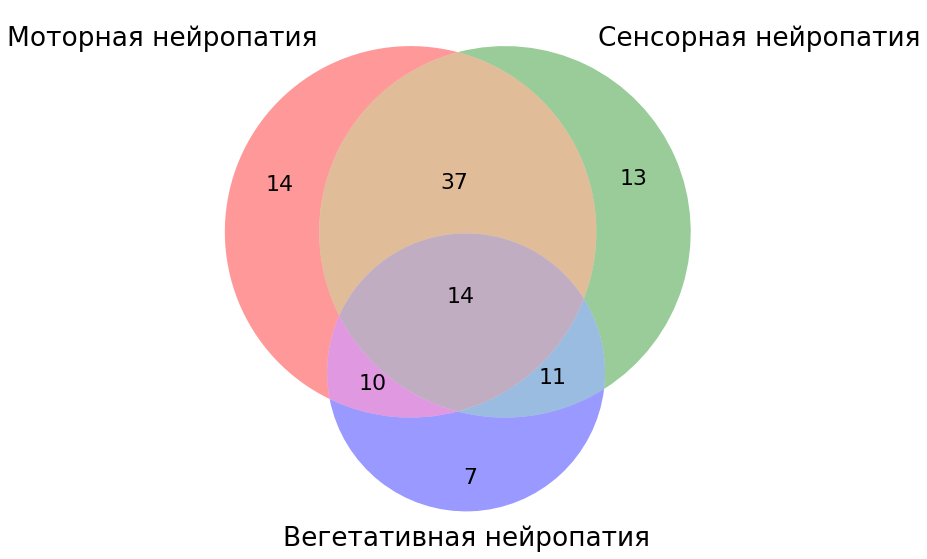

In [ ]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3

plt.figure(figsize=(10,10))
font = {'family' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
diagram = venn3((18, 34, 40, 11, 15, 24, 20))
#diagram = venn3((14, 13, 37,  7, 10, 11, 14))
diagram.get_label_by_id('A').set_text('Моторная нейропатия')
diagram.get_label_by_id('B').set_text('Сенсорная нейропатия')
diagram.get_label_by_id('C').set_text('Вегетативная нейропатия')

plt.show()



Акушерские факторы риска могут иметь влияние на развитие полинейропатии.

Составтиь таблицу сопряженности 2 на 2. Исследовать факторы риска, начиная с "ОАА" (осложненный акушерский анамнез) до "Недоношенный",  и их влияние на Факт первичного эпизода ПНП. Использовать критерий $\chi^2$ и точный тест Фишера.

Оценить относительный риск, найти 95% доверительный интервал для относительного риска.

In [ ]:
from scipy.stats.contingency import relative_risk
from scipy.stats import fisher_exact
from prettytable import PrettyTable

#Оценка относительного риска и точный тест Фишера.
#На вход подаются названия колонок, содержащих фактор риска и исход.
def safeRiskCalc(numerator, denumerator):
  if denumerator != 0:
    return str(round(numerator / denumerator*100,2))
  else:
    return '---'

def riskEstimation(factorRisk, outcome):
  expRiskOutcomeYes = len(df[(df[factorRisk] == 1) & (df[outcome] == 1)].index)
  print
  expRiskOutcomeNo = len(df[(df[factorRisk] == 1) & (df[outcome] == 0)].index)
  expRisk = expRiskOutcomeYes + expRiskOutcomeNo

  controlOutcomeYes = len(df[(df[factorRisk] == 0) & (df[outcome] == 1)].index)
  controlOutcomeNo = len(df[(df[factorRisk] == 0) & (df[outcome] == 0)].index)
  control = controlOutcomeYes + controlOutcomeNo

  pt = PrettyTable()

  cellYY = str(expRiskOutcomeYes) + ' (' + safeRiskCalc(expRiskOutcomeYes, expRisk) + ' %)'
  cellYN = str(expRiskOutcomeNo) + ' (' + safeRiskCalc(expRiskOutcomeNo, expRisk) + ' %)'
  cellNY = str(controlOutcomeYes) + ' (' + safeRiskCalc(controlOutcomeYes, control) + ' %)'
  cellNN = str(controlOutcomeNo) + ' (' + safeRiskCalc(controlOutcomeNo, control) + ' %)'

  pt.field_names = ["   ", outcome + " = Да", outcome + " = Нет", "Итого"]
  pt.add_row([factorRisk + " = Да",   cellYY, cellYN, expRisk])
  pt.add_row([factorRisk + " = Нет", cellNY, cellNN, control])
  pt.add_row(["Итого", expRiskOutcomeYes + controlOutcomeYes, expRiskOutcomeNo + controlOutcomeNo,  expRisk + control])
  print(pt)

  try:
    RR = relative_risk(expRiskOutcomeYes, expRiskOutcomeYes + expRiskOutcomeNo, controlOutcomeYes, controlOutcomeYes + controlOutcomeNo)
    print('RR =', round(RR.relative_risk, 3))
    CIlow =  round(RR.confidence_interval(confidence_level=0.95).low, 2)
    CIhigh = round(RR.confidence_interval(confidence_level=0.95).high, 2)
    print('CI = [', CIlow, '; ', CIhigh, ']', sep = '')
  except:
    print('Невозможно найти RR')

  fisherTest = fisher_exact([[expRiskOutcomeYes, expRiskOutcomeNo], [controlOutcomeYes, controlOutcomeNo]])
  print('Точный тест Фишера p-value = ', round(fisherTest[1], 4), '\n')

In [ ]:
#Оценка влияния факторов из анамнеза на развитие ПНП
factorList = []

#df['ОЛЛ'] = df['ОЛЛ'].replace({'Т': 1, 'В': 0})
#getColumnsNames('ОЛЛ', 'ОЛЛ', factorList)
getColumnsNames('ОАА', 'Недоношенный', factorList)



outcomeList = ['Факт первичного эпизода ПНП']


df = df[df['Группа про/ретро'] == 1]
for factor in factorList:
  for outcome in outcomeList:
    columnnName = df.columns[factor]
    riskEstimation(columnnName, outcome)

+-----------+----------------------------------+-----------------------------------+-------+
|           | Факт первичного эпизода ПНП = Да | Факт первичного эпизода ПНП = Нет | Итого |
+-----------+----------------------------------+-----------------------------------+-------+
|  ОАА = Да |           41 (82.0 %)            |             9 (18.0 %)            |   50  |
| ОАА = Нет |           63 (79.75 %)           |            16 (20.25 %)           |   79  |
|   Итого   |               104                |                 25                |  129  |
+-----------+----------------------------------+-----------------------------------+-------+
RR = 1.028
CI = [0.87; 1.22]
Точный тест Фишера p-value =  0.8221 

+--------------+----------------------------------+-----------------------------------+-------+
|              | Факт первичного эпизода ПНП = Да | Факт первичного эпизода ПНП = Нет | Итого |
+--------------+----------------------------------+-----------------------------------+--

Что такое поправка Йетса на непрерывность в тесте $\chi^2$?

In [ ]:
tab = pd.pivot_table(df, values=['Возраст'],  index=['Группа про/ретро'], columns='Пол',
                     aggfunc= 'count', margins=True, margins_name= 'Среднее по группе').round(2)
tab